# Descenso de gradiente para modelos de regresión lineal por OLS

## Preparación de los datos

Se importan las librerías que se van a utilizar:
- numpy: librería numérica que proporciona todo tipo de operaciones matemáticas y de algebra lineal. Vamos a utilizar el random y operaciones sobre arrays y matrices
- matplotlib: permite crear gráficos 2D, con algunas pocas funcionalidades 3D
- sklearn: librería para machine learning en Python (scikit-learn), incluye modelos de clasificación, regresión, clustering, y herramientas de reducción de dimensionalidad, selección de modelos y preprocesamiento
- statsmodels: librería de métodos y algoritmos estadísticos
- scipy: librería que integra paquetes utilizados en computación scientífica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Vamos a especificar un valor de la semilla a utilizar para el generador de números pseudo aleatorio

In [3]:
np.random.seed(123456)

Vamos a crear un set de datos sintéticos: un array de 500 filas y 1 columna con valores aleatorios, que servirán como variables predictoras del modelo de regresión: Y= w1\*x1 + b

In [4]:
x = np.random.random(500)
print("x tiene un size de: ", x.size)
print("x tiene un shape de: ", x.shape)
print("las primeras 5 filas de x son: \n", x[0:5])

x tiene un size de:  500
x tiene un shape de:  (500,)
las primeras 5 filas de x son: 
 [0.12696983 0.96671784 0.26047601 0.89723652 0.37674972]


Generamos los Y (la variable objetivo) a partir del predictor X1, introduciendo un poco de ruido aleatorio (queda en el vector epsilon).

Especificamos los coeficientes w0 (sesgo/bias) y w1 (coeficiente de la variable independiente) con valores de 2 y 4 respectivamente.

Agregamos ruido (epsilon) para que no sea perfecta la predicción.

In [5]:
w0 = 2
w1 = 4

In [6]:
epsilon = np.random.normal(0, 1, 500)
y = x*w1 + w0 + epsilon
print(y.size)
print(y.shape)
print(y[0:5])

500
(500,)
[2.9104413  6.26642606 1.27594841 6.43936955 3.89505323]


## Aprendizaje del modelo

Ahora vamos a aprender un modelo de regresión como **si no conocieramos los parámetros** reales w0 y w1.

El modelo es un objeto y ofrece diferentes métodos. Obtenemos los resultados para analizar su calidad.

Se crea el modelo de regresión lineal y se entrena con los datos de las variables independientes y dependiente

In [7]:
modelo = linear_model.LinearRegression()
modelo.fit(np.expand_dims(x, axis=1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Podemos utilizar el modelo para predecir sobre los mismos datos originales (en la vida real esto no se debe hacer, pues se estaría subestimando el error real dado el sobre aprendizaje)

In [8]:
y_pred = modelo.predict(np.expand_dims(x, axis=1))
print(y_pred.shape)
print("Predichos: ", y_pred[0:5])
print("Reales:    ", y[0:5])

(500,)
Predichos:  [2.53326285 5.81419925 3.05487797 5.54273237 3.50916503]
Reales:     [2.9104413  6.26642606 1.27594841 6.43936955 3.89505323]


Podemos obtener los coeficientes resultados de la regresión, así como métricas de calidad de ajuste del modelo.

In [9]:
params = np.append(modelo.intercept_, modelo.coef_)
print('Coefficients: \n', params)
print("Mean squared error: %.8f" %mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print('Variance score (R2): %.8f' %r2_score(y, y_pred))

r2_adjusted = 1 - (1-r2)*(len(y)-1) / (len(y) - 1 - 1)
print('R2 adjusted: %.8f' %r2_adjusted)

Coefficients: 
 [2.03718552 3.90704876]
Mean squared error: 1.04281914
Variance score (R2): 0.53253711
R2 adjusted: 0.53159843


El R2 ajustado es igual al R2 menos una penalidad por la complejidad del modelo.
Esto se debe a que a mayor número de predictores, el R2 no puede sino crecer, así las variables agregadas no estén realmente correlacionadas con la variable objetivo. El R2 corrige ese sesgo en la medida de calidad

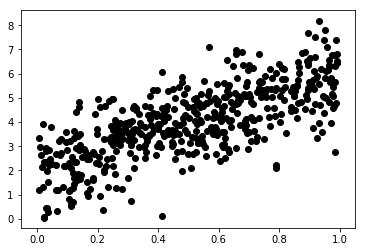

In [10]:
# Plot outputs
plt.scatter(x, y,  color='black')
plt.show()


## Significancia de los parámetros del modelo

Usamos el package statsmodels para poder analizar los coeficientes de regresión.

Si queremos el coeficiente del intercepto con statsmodels, es necesario adicionar una constante inicial a los datos predictores

In [18]:
x2 = sm.add_constant(x)
print(x2[0:10])

[[1.         0.12696983]
 [1.         0.96671784]
 [1.         0.26047601]
 [1.         0.89723652]
 [1.         0.37674972]
 [1.         0.33622174]
 [1.         0.45137647]
 [1.         0.84025508]
 [1.         0.12310214]
 [1.         0.5430262 ]]


In [12]:
modeloStats = sm.OLS(y, x2)
results = modeloStats.fit();
#Consultamos la calidad del modelo a partir de sus estadísticas
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     567.3
Date:                Fri, 21 Sep 2018   Prob (F-statistic):           2.86e-84
Time:                        16:50:13   Log-Likelihood:                -719.95
No. Observations:                 500   AIC:                             1444.
Df Residuals:                     498   BIC:                             1452.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0372      0.094     21.610      0.000       1.852       2.222
x1             3.9070      0.164     23.819      0.000       3.585       4.229
==============================================================================
Omnibus:                        4.195   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                4.000
Skew:                          -0.212   Prob(JB):                        0.135
Kurtosis:                       3.112   Cond. No.                         4.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Obtención de los parámetros a partir de Gradient Descent

Vamos a definir una función que nos permitirá ejecutar un paso de descenso de gradiente utilizando numpy.

Partimos de la función de costo que considera la regresión con 1 parámetro:

$𝐽(𝜃_0,𝜃_1,𝜃_2)=\frac{1}{2𝑚} ∑_{𝑖=1}^{𝑚}(w_0+w_1*𝑥_1^{(𝑖)}−𝑦^{(𝑖)})^2 $

Y para cada coeficiente calculamos el gradiente correspondiente:
- $gradiente𝜃_0 = \frac{1}{m} ∑_{i=1}^𝑚(𝜃_0+𝜃_1*𝑥_1^{(i)}−𝑦^{(i)})$
- $gradiente𝜃_1 = \frac{1}{m} ∑_{i=1}^𝑚(𝜃_0+𝜃_1*𝑥_1^{(i)}−𝑦^{(i)})*𝑥_1^{(i)}$


Tareas a desarrollar:

- **funcionDeCosto(w0_actual, w1_actual, arrayX, arrayY)**: función que calcula el costo de utilizar los parámetros w0 y w1 para predecir los valores de la variable dependiente Y a partir de X. Retorna el costo.
- **pasoDescensoGradiente(w0_actual, w1_actual, arrayX, arrayY, learningRate)**: función que calcula un paso de descenso de gradiente. Retorna una lista (w0_modificado, w1_modificado)
- **cicloDescensoGradiente(epocas, learningRate)**: función que inicializa los parámetros w0 y w1 e itera el número de pocas determinadas, ejecutando cada vez un paso de descenso de gradiente con el learningRate dado. Retorna los valores finales de w0 y w1.